<a id='Problem-3'></a>

## Problem 3  Dynamic Time Warping (10 pts)

[Back to top](#top)

In [ ]:
# cell block to import needed libraries
%matplotlib inline 

import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

from io import StringIO
import requests
import json

from io import BytesIO  
import requests  
import json  

import datetime
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from yahoo_finance import Share
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf


from scipy.cluster.hierarchy import fcluster

import datetime
import seaborn as sns;
from scipy import stats
import scipy.cluster.hierarchy as hac

import warnings

import sklearn
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn import datasets

import seaborn
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.graphics.api as smg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, periodogram
from statsmodels.graphics.gofplots import qqplot

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from matplotlib.colors import ListedColormap

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

### Problem 3a

For the time-series cluster containing OAKMX, compute the mean of the fund members at every close in the cluster.
If the DTW operation is computationally challenging on your computer, you have the option of downsampling the cluster and dtw.txt data file by taking the average of each 5 points.  That is, average(original[0:4]) --> new[0], average(original[5:9])-->new[1], etc.  

Plot the raw [downsampled] data aginst raw [downsampled] dtw.txt file data.


In [288]:
# load dtw data and check shape
df_dtw = pd.read_table(get_object_storage_file_with_credentials_b80cde39751d45f8b20c1a75f94363a1('E82project','dtw.txt'), index_col = False, header = None)
print (df_dtw.head())
print (df_dtw.shape)

       0
0  35.86
1  36.08
2  36.11
3  36.11
4  36.38
(1008, 1)


In [289]:
normalized_ts_shift = timeseries_set - timeseries_set.shift(1,axis = 1)
# remove the first column, since it contains NaN
normalized_ts_shift_rm = normalized_ts_shift.iloc[:,1:]
normalized_ts_shift_rm.head()

timepoint,2,3,4,5,6,7,8,9,10,11,...,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824
symbol,,,,,,,,,,,,,,,,,,,,,
AACTX,-0.010000,0.120000,0.040000,-0.010000,-0.010000,-0.010000,0.030000,0.01,0.100000,0.030000,...,0.00,-0.010000,0.020000,0.003333,0.003333,0.003333,0.000000,0.010000,0.05,0.010000
AADTX,-0.010000,0.150000,0.050000,-0.013333,-0.013333,-0.013333,0.030000,0.02,0.110000,0.050000,...,-0.01,-0.010000,0.020000,0.003333,0.003333,0.003333,0.000000,0.020000,0.06,0.010000
AAETX,-0.010000,0.160000,0.060000,-0.016667,-0.016667,-0.016667,0.040000,0.02,0.120000,0.060000,...,0.00,-0.020000,0.030000,0.003333,0.003333,0.003333,0.000000,0.030000,0.07,0.020000
AAFTX,-0.010000,0.170000,0.050000,-0.016667,-0.016667,-0.016667,0.040000,0.02,0.130000,0.060000,...,-0.01,-0.010000,0.020000,0.006667,0.006667,0.006667,0.000000,0.040000,0.09,0.020000
AAGPX,-0.029999,0.440001,0.109999,-0.040000,-0.040000,-0.040000,0.129999,0.03,0.359999,0.120001,...,-0.07,-0.020001,0.100001,-0.013334,-0.013334,-0.013334,-0.030001,0.110001,0.16,0.130001


In [290]:
# get label from cluster
kmeans_labels = KMeans(init='k-means++', n_clusters=11, n_jobs = 10, random_state=0)\
.fit(normalized_ts_shift_rm).predict(normalized_ts_shift_rm)

# add label to time series data
timeseries_set_label = timeseries_set.copy()
timeseries_set_label['cluster'] = kmeans_labels
timeseries_set_label.head()

timepoint,1,2,3,4,5,6,7,8,9,10,...,1816,1817,1818,1819,1820,1821,1822,1823,1824,cluster
symbol,,,,,,,,,,,,,,,,,,,,,
AACTX,9.660000,9.65,9.770000,9.81,9.800000,9.790000,9.780000,9.81,9.82,9.920000,...,12.31,12.330000,12.333333,12.336667,12.34,12.340000,12.35,12.40,12.410000,10
AADTX,9.710000,9.70,9.850000,9.90,9.886667,9.873333,9.860000,9.89,9.91,10.020000,...,13.03,13.050000,13.053333,13.056667,13.06,13.060000,13.08,13.14,13.150000,10
AAETX,9.920000,9.91,10.070000,10.13,10.113333,10.096667,10.080000,10.12,10.14,10.260000,...,13.82,13.850000,13.853333,13.856667,13.86,13.860000,13.89,13.96,13.980000,10
AAFTX,9.850000,9.84,10.010000,10.06,10.043333,10.026667,10.010000,10.05,10.07,10.200000,...,14.07,14.090000,14.096667,14.103333,14.11,14.110000,14.15,14.24,14.260000,10
AAGPX,19.959999,19.93,20.370001,20.48,20.440000,20.400001,20.360001,20.49,20.52,20.879999,...,27.10,27.200001,27.186667,27.173334,27.16,27.129999,27.24,27.40,27.530001,3


In [291]:
# cluster where OAKMX in
cluster_n_OAKMX  = timeseries_set_label.loc['OAKMX']['cluster']
# isolate all member 
cluster_OAKMX = timeseries_set_label[timeseries_set_label['cluster']==cluster_n_OAKMX]
# compute mean of the fund members at every close in the cluster
cluster_OAKMX_mean = cluster_OAKMX.loc[:, cluster_OAKMX.columns != 'cluster'].mean(axis = 0)

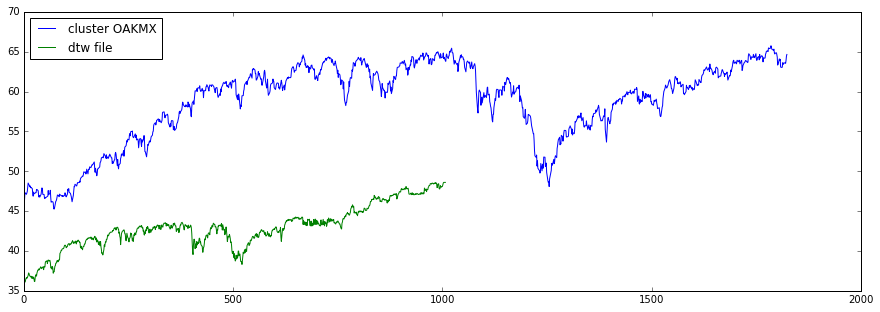

In [303]:
plt.figure(figsize=(15, 5))
plt.plot(cluster_OAKMX_mean.values, label = 'cluster OAKMX')
plt.plot(df_dtw.values, label = 'dtw file')
plt.legend(loc = "upper left")
plt.show()

### Problem 3b

[back to top](#top)

<a id="Problem-3b"></a>

Perform a dynamic time warping of the two time series.  Plot the aligned signals.  Provide intution on what the time warping is doing in text and possibly graphics.

In [295]:
! pip install dtw

    100% |████████████████████████████████| 61kB 2.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for dtw ... done
  Stored in directory: /gpfs/fs01/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.cache/pip/wheels/e7/74/df/db28978a379f3e97d890e9731247da5c3342de0adfabc1be0d
Successfully built dtw


In [600]:
def match_waveform(x, y, path):
    fig = plt.figure(figsize=(25, 15))
    ax = fig.add_subplot(111)
    for i, j in zip(path[0], path[1]):
        plt.plot((i,j), (x[i], y[j]), color = 'black', linewidth= 0.2)
        plt.plot(x)
        plt.plot(y)

In [602]:
from scipy.spatial.distance import euclidean
import itertools
from numpy.linalg import norm
from dtw import dtw
dist, cost, acc, path = dtw(cluster_OAKMX_mean.values, df_dtw.values, dist=euclidean)
#dist, cost, acc, path = dtw(cluster_OAKMX_mean.values, df_dtw.values, dist=lambda x, y: norm(x - y, ord=1) )
print('Minimum distance found:', dist)

Minimum distance found: 7.57670926326


(-0.5, 1007.5)

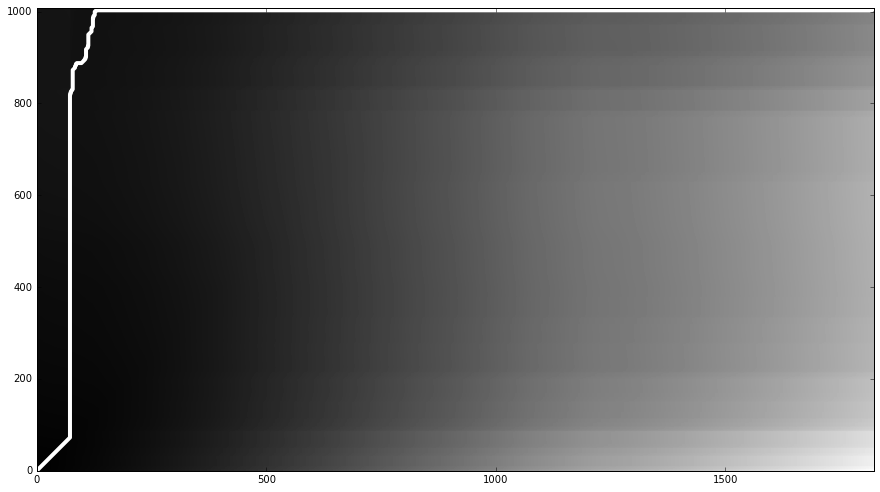

In [312]:
plt.figure(figsize=(15, 15))
plt.imshow(acc.T, origin='lower', cmap=plt.get_cmap("gray"),  interpolation='nearest')
plt.plot(path[0], path[1], 'w',  linewidth=4.0 )
plt.xlim((-0.5, acc.shape[0]-0.5))
plt.ylim((-0.5, acc.shape[1]-0.5))

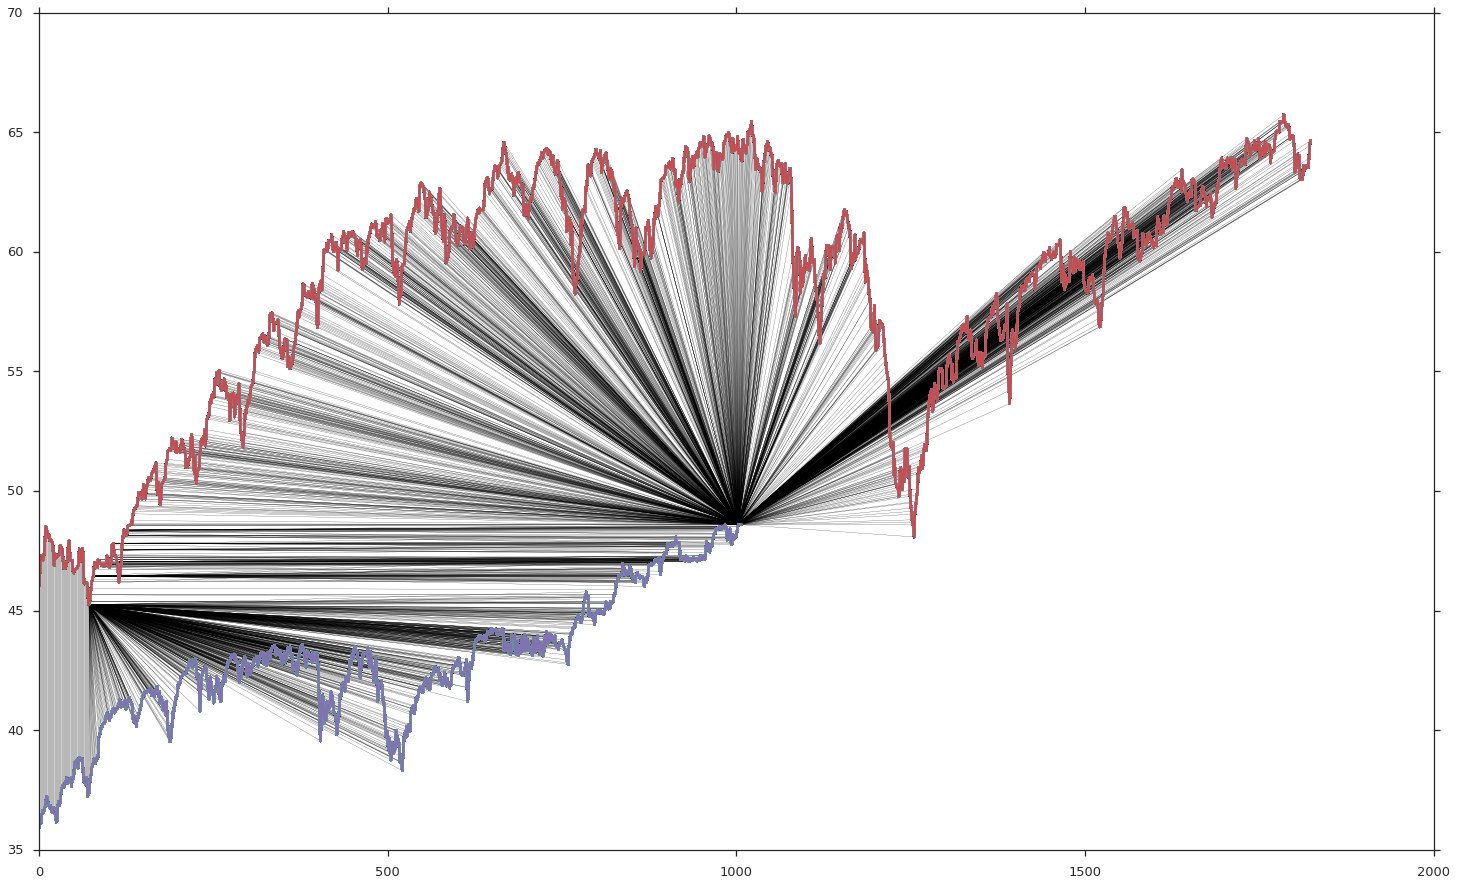

In [603]:
x = cluster_OAKMX_mean.values
y = df_dtw.values
short_path = path
match_waveform( x, y , short_path)

### we flip both waveforms' array from left to right and do dtw again in the following steps

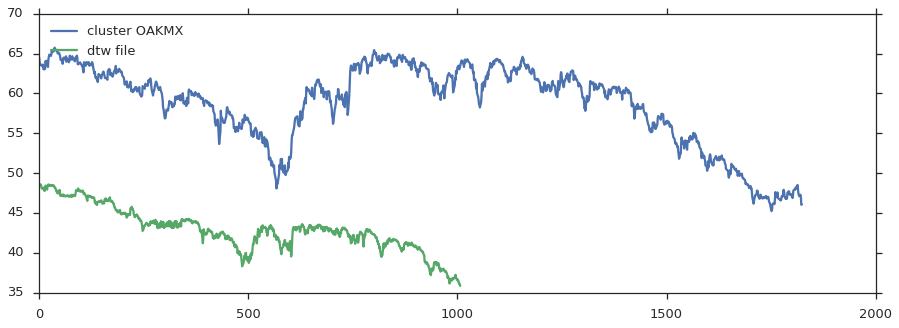

In [595]:
reverse_mean_line = np.flipud(cluster_OAKMX_mean.values) 
reverse_dtw = np.flipud(df_dtw.values)

plt.figure(figsize=(15, 5))
plt.plot(reverse_mean_line, label = 'cluster OAKMX')
plt.plot(reverse_dtw, label = 'dtw file')
plt.legend(loc = "upper left")
plt.show()

In [596]:
dist_flip, cost_flip, acc_flip, path_flip = dtw(reverse_mean_line, reverse_dtw, dist=euclidean)
#dist, cost, acc, path = dtw(cluster_OAKMX_mean.values, df_dtw.values, dist=lambda x, y: norm(x - y, ord=1) )
print('Minimum distance found:', dist)

Minimum distance found: 22826.06955338094


(-0.5, 1007.5)

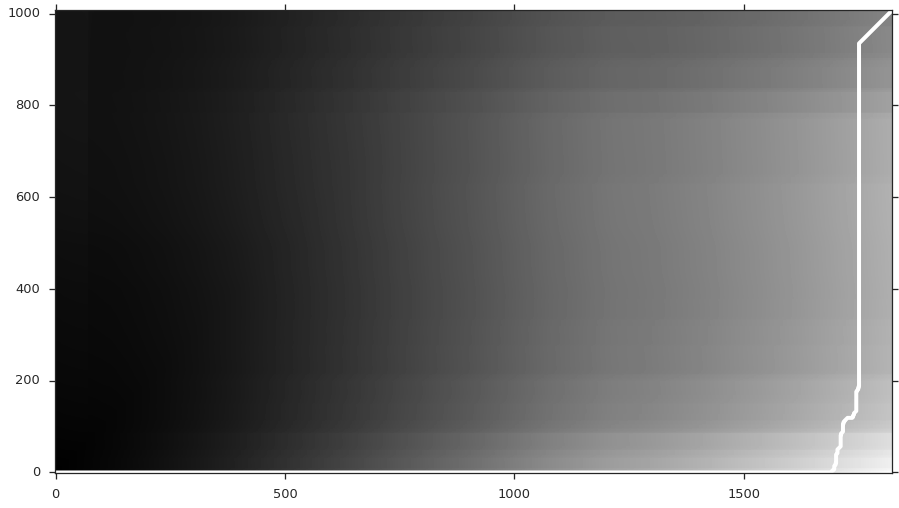

In [597]:
plt.figure(figsize=(15, 15))
plt.imshow(acc.T, origin='lower', cmap=plt.get_cmap("gray"),  interpolation='nearest')
plt.plot(path_flip[0], path_flip[1], 'w',  linewidth=4.0 )
plt.xlim((-0.5, acc.shape[0]-0.5))
plt.ylim((-0.5, acc.shape[1]-0.5))

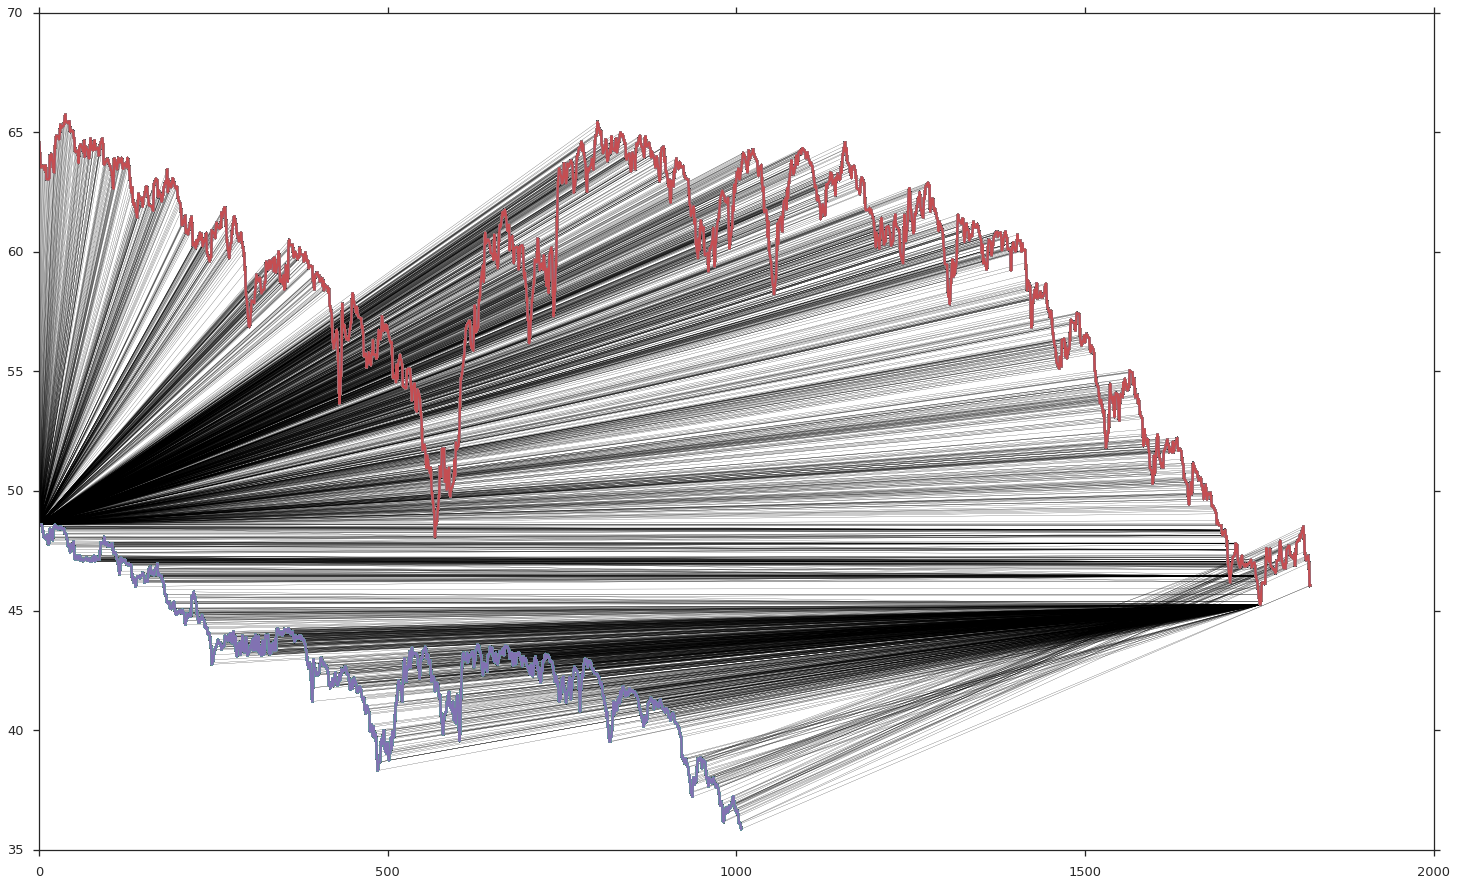

In [601]:
x = reverse_mean_line
y = reverse_dtw
short_path = path_flip
match_waveform( x, y , short_path)

### we apply fastdtw again on the orignal data in the following steps

In [328]:
!pip install fastdtw


    100% |████████████████████████████████| 122kB 4.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for fastdtw ... done
  Stored in directory: /gpfs/fs01/user/sfdb-2095b6be7f15a4-029a8c7f11e3/.cache/pip/wheels/b8/f6/99/dcabd95de8eda226720152c72bf0f774db7cb3e3b0519c0ed6
Successfully built fastdtw


In [504]:
from fastdtw import fastdtw
dist, fast_path = fastdtw(cluster_OAKMX_mean.values, df_dtw.values,dist=euclidean)
print(dist)

22826.06955338094


In [334]:
len(fast_path)
fast_path[2200:2205]

[(1819, 1003), (1820, 1004), (1821, 1005), (1822, 1006), (1823, 1007)]

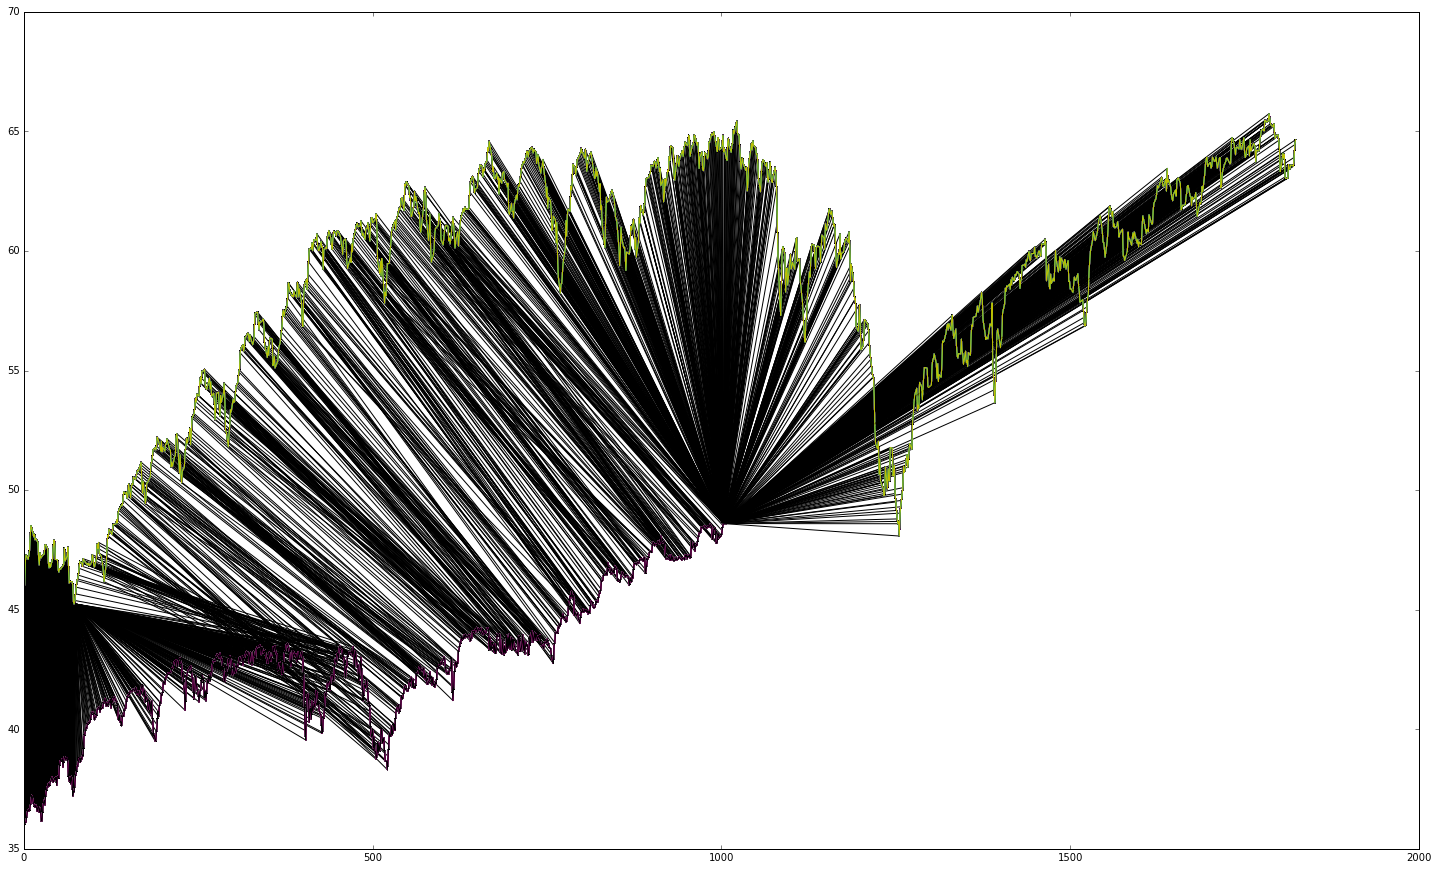

In [332]:
x = cluster_OAKMX_mean.values
y = df_dtw.values
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111)
for i, j in fast_path:
    plt.plot((i,j), (x[i], y[j]), color = 'black')
    plt.plot(x)
    plt.plot(y)

### in this dynamic time warping problem, we applied both dtw and fastdtw python functions. the plot of how points along both time series are matching up with each other is as above. 
### Dynamic time warping method is to find the least cost path to connect two time series' point together, in order to find the similarity between them.
### One thing notable here is that the distance calculated from fastdtw is the exact match of dtw with the waves flipped left to right, and the waveform matching plot also suggest that the points being matched in these two methods are same. However, the distance from dtw with the original data set is way small. But the paths shown in the grids for both dtw with original data and dtw with flipped data are prefectly flip of each other, which fits our expectation. 